In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.layers import Conv2D, Flatten, MaxPooling2D, BatchNormalization, Activation, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.applications import InceptionV3
import keras.backend as K

Using TensorFlow backend.


In [23]:
train = pd.read_csv('sign_mnist_train.csv')
print(train.shape)

(27455, 785)


In [24]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [25]:
labels = train.pop('label')
label = to_categorical(labels)
label.shape

(27455, 25)

In [31]:
label[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
train_data = train.values
#reshape
train_data = np.array([np.reshape(i,(28,28)) for i in train_data])
#normalize
train_data = train_data / 255
train_data.shape

(27455, 28, 28)

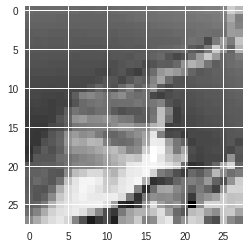

In [41]:
plt.imshow(train_data[1])

In [44]:
X_train, X_val, y_train, y_val = train_test_split(train_data, label, test_size=0.2, random_state=23)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(21964, 28, 28) (5491, 28, 28) (21964, 25) (5491, 25)


In [47]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_val = X_val.reshape(X_val.shape[0], 28,28,1)
print(X_train.shape, X_val.shape)

(21964, 28, 28, 1) (5491, 28, 28, 1)


In [48]:
model = Sequential()
model.add(Conv2D(4, (5,5), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(12, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=40, batch_size=512, validation_data=(X_val, y_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/40
21964/21964 [==============================] - 10s 433us/step - loss: 3.1480 - acc: 0.0800 - val_loss: 2.9527 - val_acc: 0.2972
Epoch 2/40
21964/21964 [==============================] - 8s 369us/step - loss: 2.6049 - acc: 0.2421 - val_loss: 2.0200 - val_acc: 0.4704
Epoch 3/40
21964/21964 [==============================] - 8s 372us/step - loss: 2.0107 - acc: 0.3732 - val_loss: 1.5746 - val_acc: 0.5660
Epoch 4/40
21964/21964 [==============================] - 8s 363us/step - loss: 1.6998 - acc: 0.4627 - val_loss: 1.3098 - val_acc: 0.6303
Epoch 5/40
21964/21964 [==============================] - 9s 404us/step - loss: 1.4776 - acc: 0.5257 - val_loss: 1.0786 - val_acc: 0.7037
Epoch 6/40
21964/21964 [==============================] - 8s 370us/step - loss: 1.2976 - acc: 0.5815 - val_loss: 0.9166 - val_acc: 0.7574
Epoch 7/40
21964/21964 [==============================] - 8s 345us/step - loss: 1.1396 - acc: 0.6314 - val_loss: 0.7616 - 

In [52]:
model.save_weights('model1.h5')

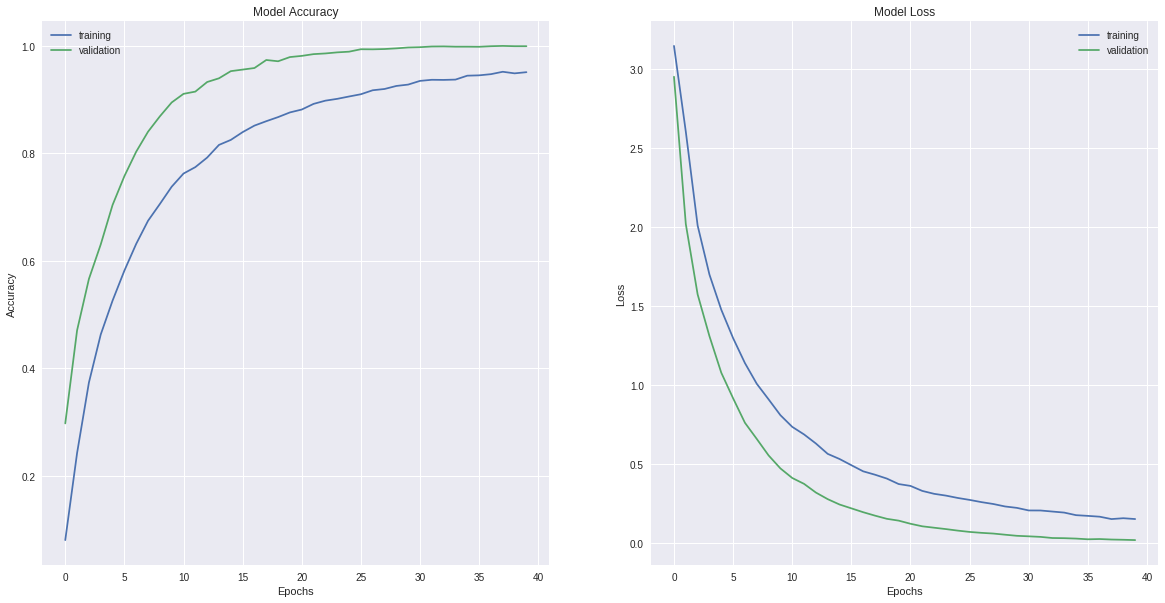

In [53]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].set_title("Model Accuracy")
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend(['training', 'validation'])

ax[1].set_title("Model Loss")
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend(['training', 'validation'])

In [56]:
test = pd.read_csv("sign_mnist_test.csv")
# generate label data
y_test = test.pop('label')
y_test = to_categorical(y_test)
# generate test data
X_test = test.values
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])
X_test = X_test / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
print(X_test.shape, y_test.shape)

(7172, 28, 28, 1) (7172, 25)


In [57]:
predictions = model.predict(X_test)


In [58]:
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
test_accuracy

0.89654210819855

Predicted: G with the probability of: 0.9998558759689331
Actual class:  G


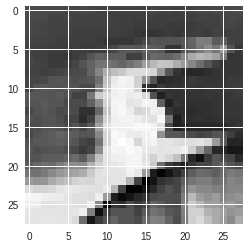

Predicted: F with the probability of: 0.9877898693084717
Actual class:  F


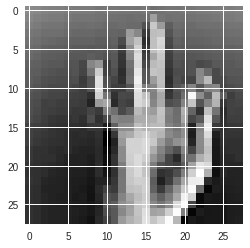

Predicted: K with the probability of: 0.9999035596847534
Actual class:  K


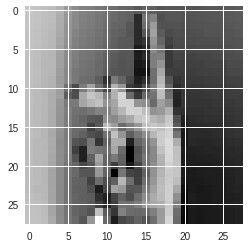

Predicted: A with the probability of: 0.9981970191001892
Actual class:  A


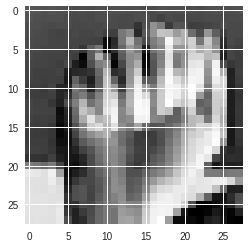

Predicted: D with the probability of: 0.9990515112876892
Actual class:  D


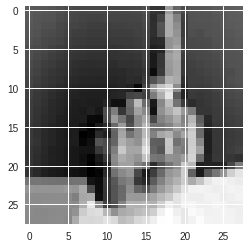

In [59]:
num_preview = 5
for i in range(num_preview):
    predicted_class = np.argmax(predictions[i])
    prob = predictions[i][predicted_class]
    print("Predicted: {} with the probability of: {}".format(chr(predicted_class+65), prob))
    print("Actual class: ", chr(np.argmax(y_test[i])+65))
    plt.imshow(X_test[i].reshape(28,28))
    plt.show()